In [ ]:
#Alejandro Adriaensens Martínez
#Gael Ordaz Zamora
#Andrea Isabel González
#Roy Medina

## Librerias


In [2]:
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 1. Introducción:

El objetivo principal de este análisis fue reducir la dimensionalidad de un conjunto de datos inicialmente compuesto por 211 variables. Este proceso de reducción de dimensionalidad se llevó a cabo mediante el uso de la técnica de Análisis de Componentes Principales (PCA).

## 2. Preprocesamiento: Eliminación y Combinación de Columnas:

Observamos que el conjunto de datos inicial tenía 211 variables, y decidimos reducir la dimensionalidad descartando y combinando columnas relacionadas al número de población en grupos de edades. Esto resultó en un nuevo conjunto de datos con 190 variables.

In [3]:
data = pd.read_csv('variables_completas_cortadas.csv')
data = data.dropna()
data


,Unnamed: 0,POBTOT,POBFEM,POBMAS,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_0A5,P_0A5_F,P_0A5_M,...,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,#llamadas,GRS_num
3,3,2302.0,1145,1157,1775,894,881,190,78,104,...,394,261,175,88,23,44,249,8,115.0,2.0
4,4,3419.0,1788,1631,2526,1340,1186,327,146,146,...,960,758,792,522,6,9,56,0,3.0,1.0
7,7,475.0,220,255,336,168,168,45,20,31,...,104,53,32,17,3,15,30,0,123.0,3.0
13,13,162.0,78,84,131,65,66,9,9,6,...,37,17,15,8,3,0,19,0,53.0,2.0
21,21,756.0,371,385,519,253,266,84,37,48,...,135,83,22,27,9,10,57,7,41.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,3444.0,1709,1735,2376,1163,1213,349,170,185,...,439,297,137,79,13,45,352,6,1.0,3.0
537,537,3291.0,1631,1660,2371,1167,1204,330,148,160,...,523,212,79,58,14,73,264,6,289.0,3.0
538,538,4087.0,1862,2225,3812,1690,2122,88,26,41,...,1947,1014,1384,704,107,13,54,0,52.0,1.0
539,539,1514.0,764,750,1175,608,567,131,57,74,...,367,262,276,36,7,43,143,4,332.0,2.0


## 3. Modelo PCA


Aplicamos el Análisis de Componentes Principales (PCA) para reducir aún más la dimensionalidad y resaltar las variables más significativas.

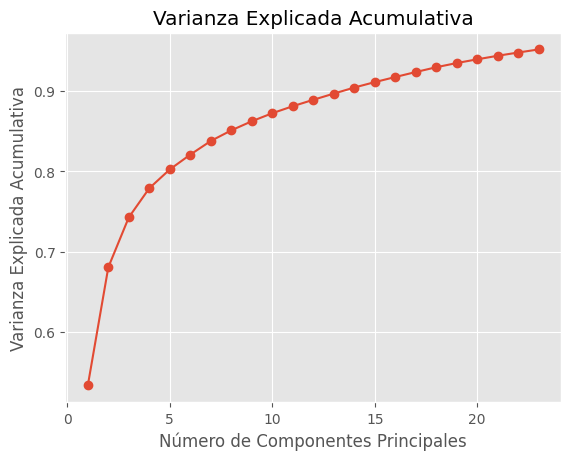

In [42]:
# Escala las variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Punto 3: Análisis de Componentes Principales (PCA)
pca = PCA(23)
principal_components = pca.fit_transform(scaled_data)

# Punto 4: Selección de atributos y visualización
# Varianza explicada acumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Visualización de la varianza explicada acumulativa
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Varianza Explicada Acumulativa')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.grid(True)
plt.show()


In [39]:

# Selección del número de componentes principales (por ejemplo, 95% de varianza explicada)
n_components = sum(cumulative_variance < 0.95) + 1
print(f'Número de componentes principales seleccionados: {n_components}')


Número de componentes principales seleccionados: 23


## 4. Selección de Atributos y Visualización Final:

Seleccionamos el segundo componente principal, ya que observamos que el primer componente contenía información redundante sobre la población. Identificamos las 20 variables más importantes basándonos en los vectores de carga asociados al segundo componente.

In [107]:
# Visualización de los vectores de carga para el primer componente principal
loading_vector = pca.components_[1]
loading_vector_abs = abs(loading_vector)
loading_vector_normalized = loading_vector_abs / loading_vector_abs.sum()



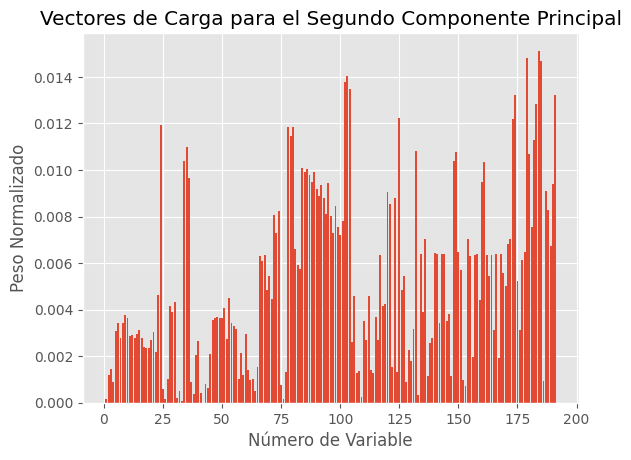

In [110]:
# Visualización de los vectores de carga
plt.bar(range(1, len(loading_vector_normalized) + 1), loading_vector_normalized)
plt.title('Vectores de Carga para el Segundo Componente Principal')
plt.xlabel('Número de Variable')
plt.ylabel('Peso Normalizado')
plt.grid(True)
plt.show()

In [88]:
# Load the Dicctionary 
diccionario = pd.read_csv('diccionario.csv')

In [111]:
# Obtener las 20 variables más importantes
top_variables_indices = loading_vector_abs.argsort()[-20:][::-1]
top_variables_names = data.columns[top_variables_indices]



In [112]:
# Load the Dicctionary 
diccionario = pd.read_csv('diccionario.csv')

# Printing the description and indicator of the variables
print("Las 20 variables más importantes con descripciones e indicadores:")
for i, variable in enumerate(top_variables_names, 1):
    descripcion = diccionario[diccionario['Mnemónico'] == variable]['Indicador'].values
    print(f"{i}. {variable}: {descripcion}")

Las 20 variables más importantes con descripciones e indicadores:
1. VPH_SPMVPI: ['Viviendas particulares habitadas que disponen de servicio de películas, música o videos de paga por Internet']
2. VPH_PC: ['Viviendas particulares habitadas que disponen de computadora, laptop o tablet']
3. VPH_CVJ: ['Viviendas particulares habitadas que disponen de consola de videojuegos']
4. GRAPROES_F: ['Grado promedio de escolaridad de la población femenina']
5. GRAPROES: ['Grado promedio de escolaridad']
6. GRAPROES_M: ['Grado promedio de escolaridad de la población masculina']
7. VPH_AUTOM: ['Viviendas particulares habitadas que disponen de automóvil o camioneta']
8. GRS_num: []
9. VPH_STVP: ['Viviendas particulares habitadas que disponen de servicio de televisión de paga']
10. PAFIL_IPRIV: ['Población afiliada a servicios de salud en una institución privada']
11. VPH_HMICRO: ['Viviendas particulares habitadas que disponen de horno de microondas']
12. PROM_HNV: ['Promedio de hijas e hijos nacidos v